## Bank Marketing Cross-sell | Logistic Regression & Decision Tree

In [87]:
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import statsmodels.api as sm
import xgboost as xgb
from imblearn.over_sampling import RandomOverSampler
import sklearn 
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, f1_score, precision_score,confusion_matrix, accuracy_score,roc_auc_score,classification_report,roc_curve

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read dataframe
train=pd.read_csv("data/train_cross.csv")
test=pd.read_csv("data/test_cross.csv")
test.shape,train.shape

((127037, 11), (381109, 12))

In [3]:
train.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [5]:
test.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111


In [6]:
# To get a concise summary of the dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [8]:
## statistical description
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [10]:
## check null values
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [11]:
test.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [13]:
# check the categorical features
catg_features=[col for col in train.columns if ((train[col].dtypes=='O') & (col not in ['Response']))]
print(catg_features)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [15]:
# check the numerical features
num_features=[col for col in train.columns if ((train[col].dtypes!='O') & (col not in ['Response']))]
print(num_features)

['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


In [16]:
# check the unique value of categorical features 
for features in catg_features:
    print('The feature is {} and number of categories are {}'.format(features,len(train[features].unique())))

The feature is Gender and number of categories are 2
The feature is Vehicle_Age and number of categories are 3
The feature is Vehicle_Damage and number of categories are 2


## Exploratory Data Analysis

In [18]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

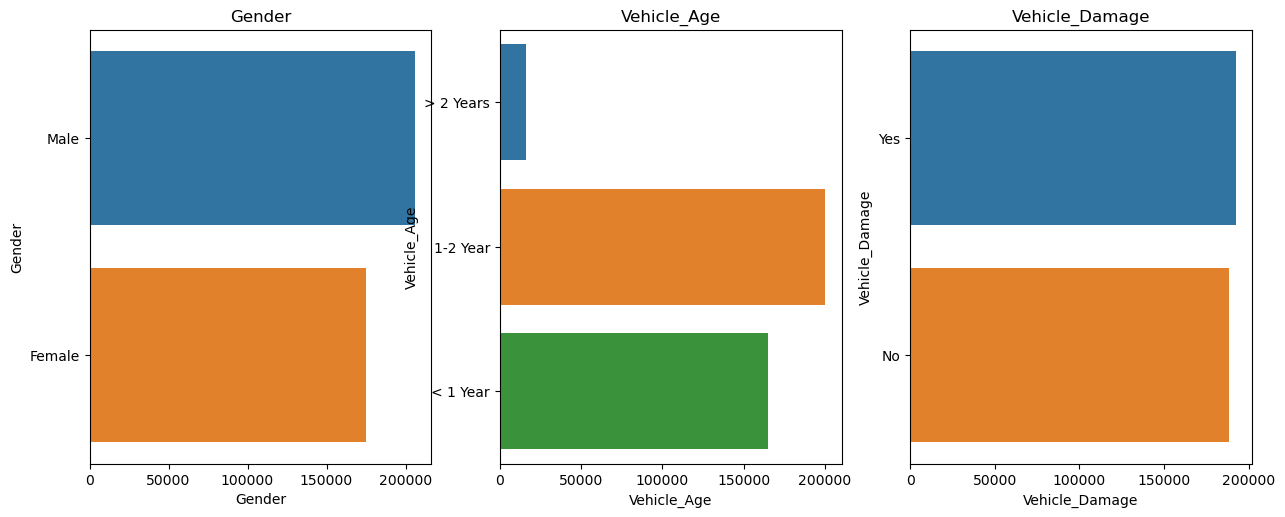

In [19]:
# Univariant Analysis of categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for features in catg_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=features,data=train, palette=colors)
    plt.xlabel(features)
    plt.title(features)
    plotnumber+=1
plt.savefig('images/cross_sell/catg_analysis.png')
plt.show()

In [20]:
# plot relationship between catgeorical features and target column deposit
def create_countplot(data, feature, palette, save_path):
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, hue='Response', data=train, palette=palette)
    plt.savefig(save_path)
    plt.show()

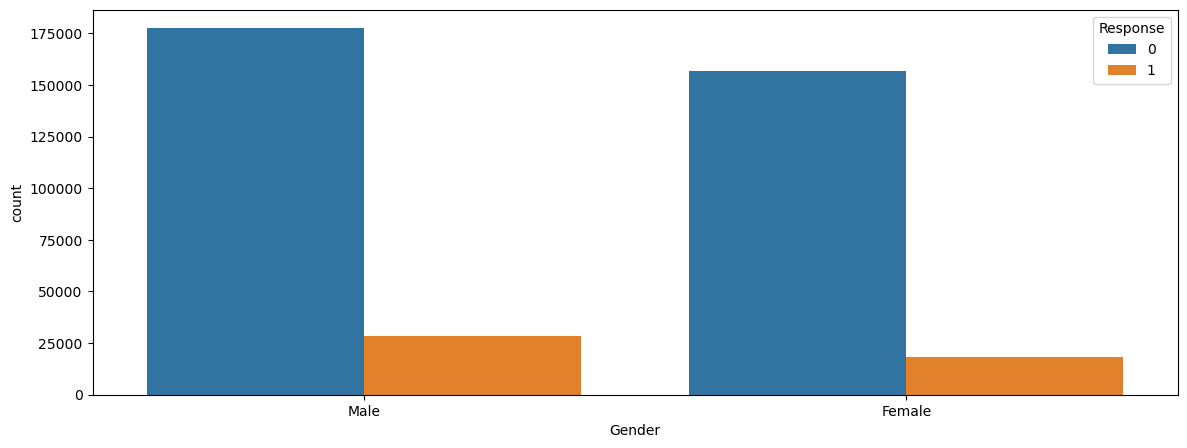

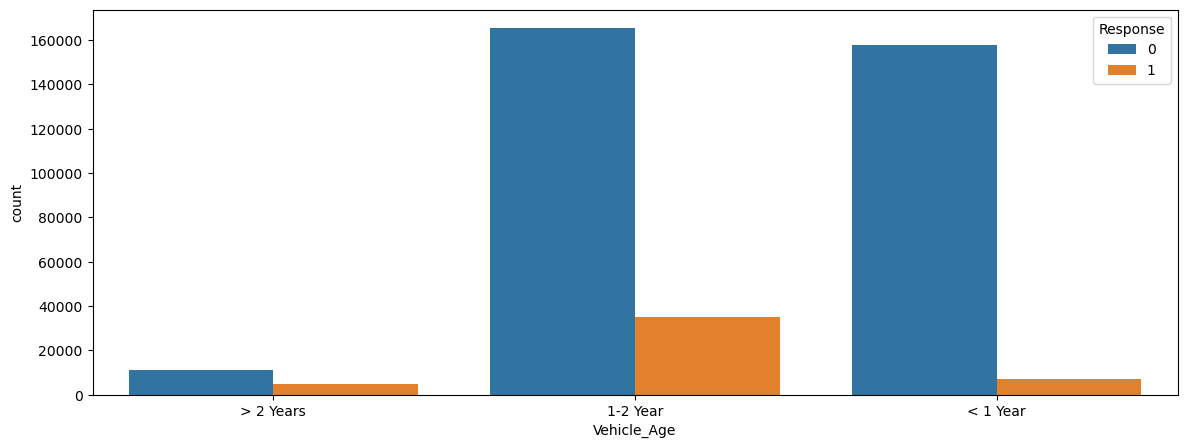

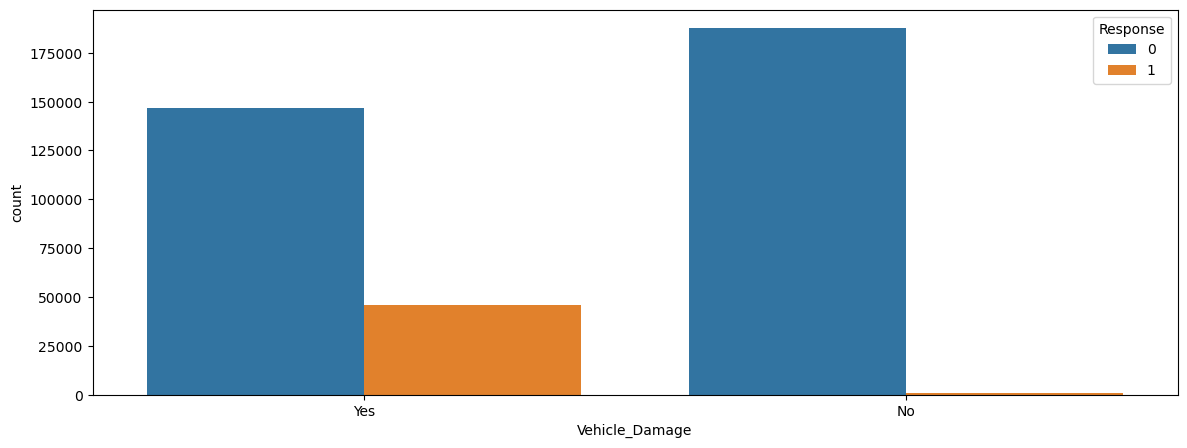

In [23]:
cat_features = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# Loop over the categorical features and call the function for each one
for feature in cat_features:
    save_path = f'images/cross_sell/{feature}VSResponse.png'
    create_countplot(train, feature, colors, save_path)

In [ ]:
# Males interested in insurance % : 13.841107482689518
# Females interested in insurance % : 10.390241115301109
#If the age is less than 1 year, Customers are most likely to respond NO.
#Customers whose vehicle is NOT damaged in past are almost certainly going to respond NO for vehicle insurance.
#So, like 'Previously_Insured', 'Vehicle_Damage' in past turns out to be an excellent feature!

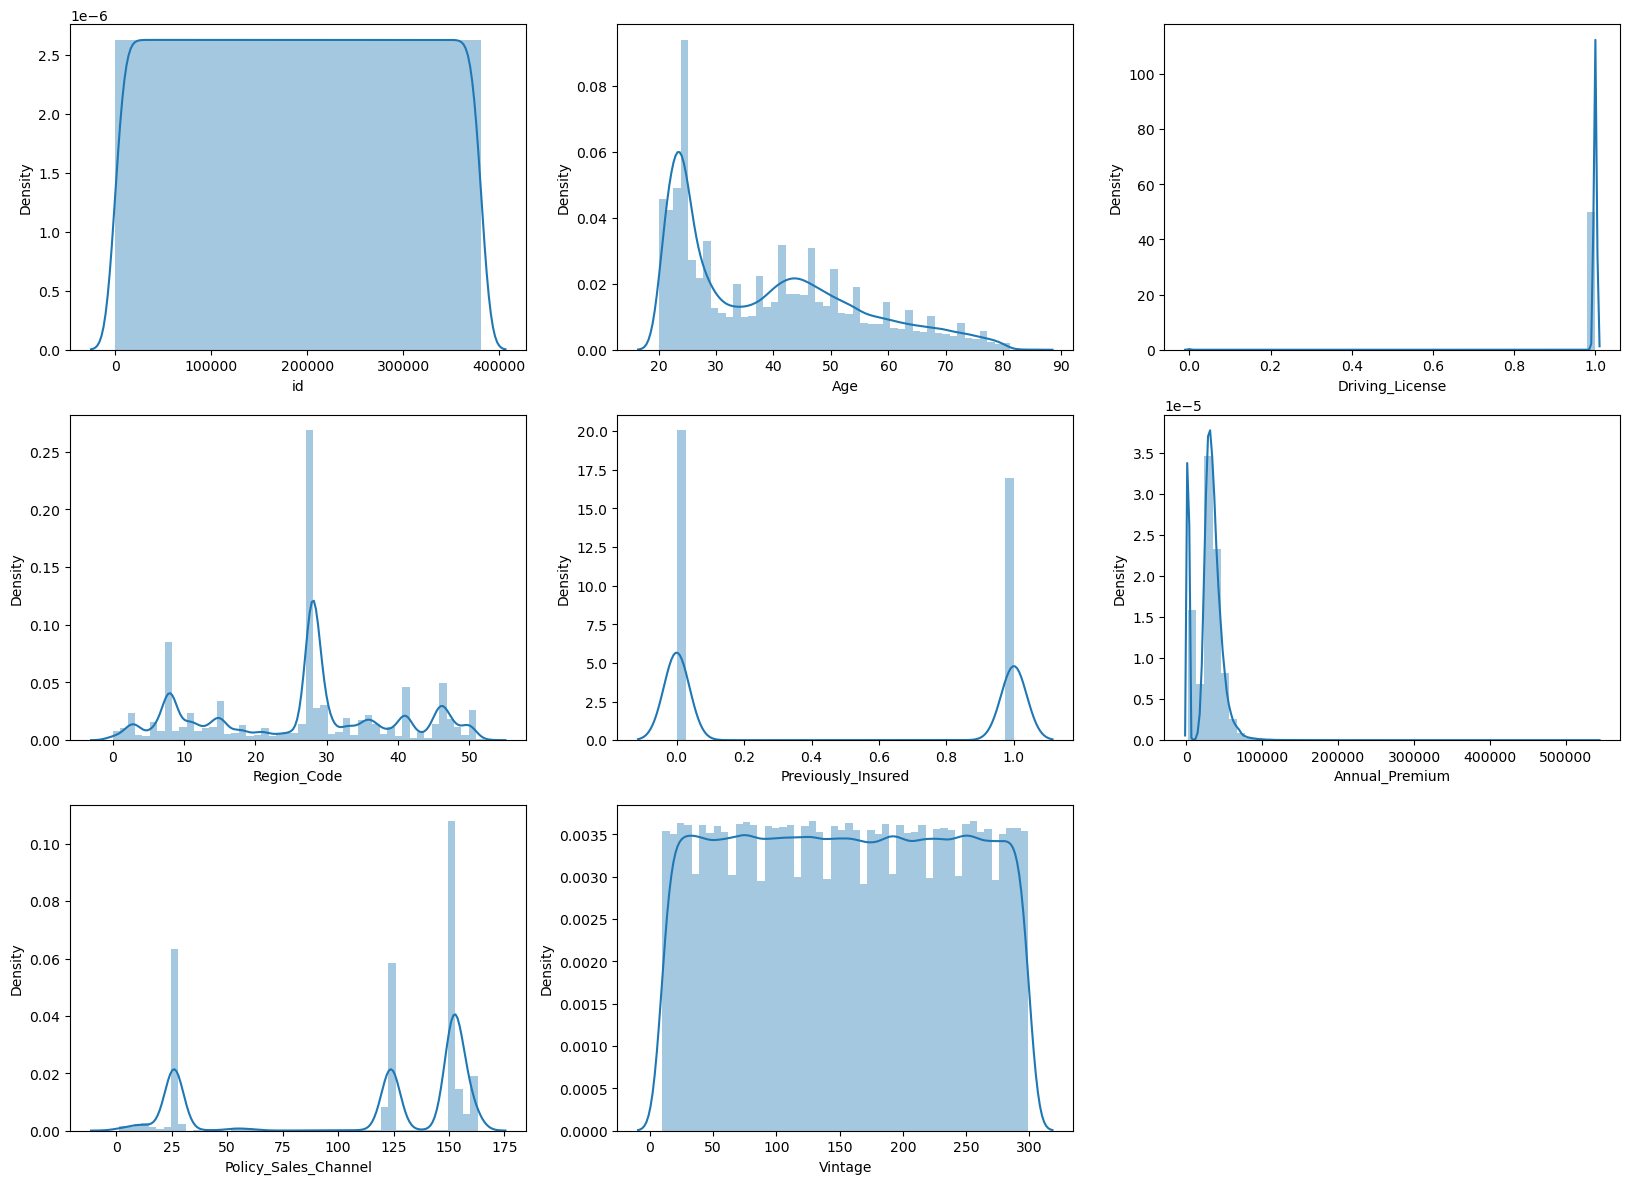

In [25]:
# Univariant Analysis of Numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
colors = ['#1f77b4', '#ff7f0e']
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(train[num_feature],color=colors[0])
    plt.xlabel(num_feature)
    plotnumber+=1
plt.savefig('images/cross_sell/num_analysis.png')
plt.show()

In [27]:
train.head(1)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1


In [ ]:
#'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

<Figure size 700x500 with 0 Axes>

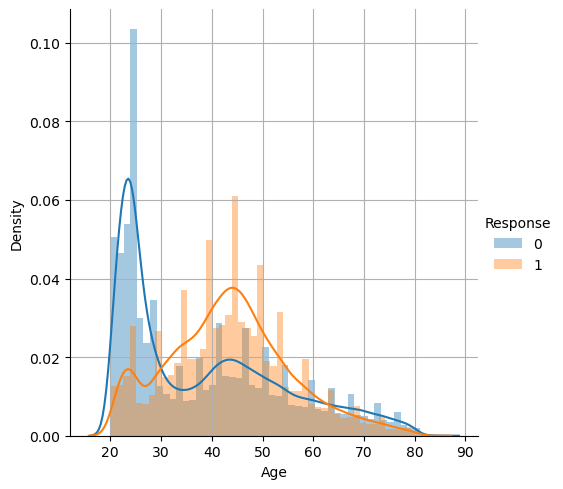

<Figure size 640x480 with 0 Axes>

In [34]:
## Age VS Response
plt.figure(figsize=(7,5))
sns.FacetGrid(data = train, hue = 'Response', height = 5).map(sns.distplot, 'Age').add_legend()
plt.grid()
plt.show()
plt.savefig('images/cross_sell/AgeVSResponse.png')

<Figure size 700x500 with 0 Axes>

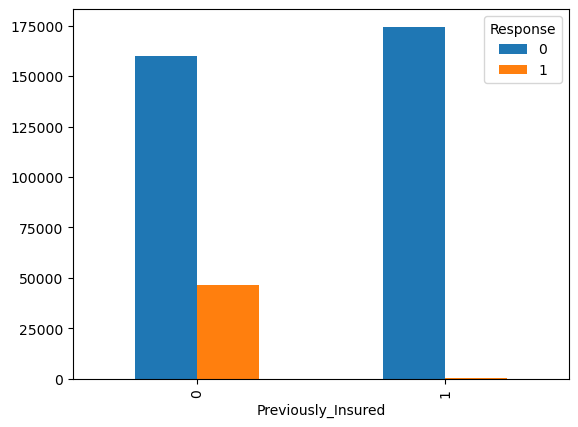

In [35]:
# Previously_Insured VS Response
plt.figure(figsize=(7,5))
train.groupby(['Previously_Insured', 'Response']).size().unstack().plot(kind = 'bar')
plt.savefig('images/cross_sell/Previously_InsuredVSResponse.png')

In [ ]:
# # There are only 158 such peope who have previously got insured and want to insure again!
# Among the customers who already have their vehicle insured, almost all of them Responded NO.
# Among the customers who so not have have their vehicle insured, nearly 30% would want to get insured.
# So clearly, this is a good distinctive feature for prediction.

<Figure size 400x400 with 0 Axes>

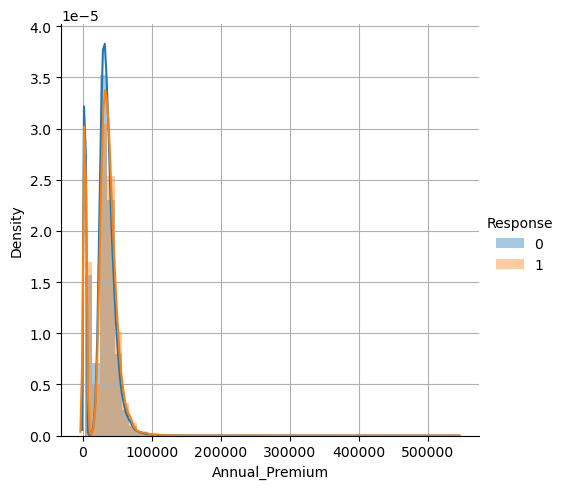

<Figure size 640x480 with 0 Axes>

In [38]:
# Annual_Premium VS Response
plt.figure(figsize=(4,4))
sns.FacetGrid(data = train, hue = 'Response', height = 5).map(sns.distplot, 'Annual_Premium').add_legend()
plt.grid()
plt.show()
plt.savefig('images/cross_sell/Annual_PremiumVSResponse.png')

In [ ]:
# There is no clear distinction here. So we cannot say anything conclusive from this univariate feature analysis. Due to presence of outlier values, 
# we may need to scale this featue to minimize the effect of outli

<Figure size 400x400 with 0 Axes>

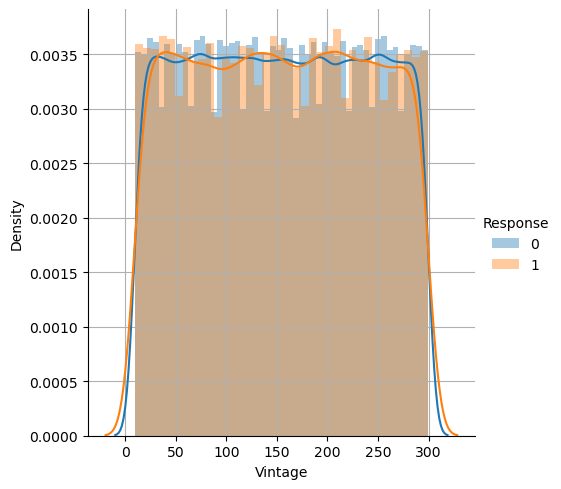

<Figure size 640x480 with 0 Axes>

In [39]:
# Vinatge VS Response
plt.figure(figsize=(4,4))
sns.FacetGrid(data = train, hue = 'Response', height = 5).map(sns.distplot, 'Vintage').add_legend()
plt.grid()
plt.show()
plt.savefig('images/cross_sell/VintageVSResponse.png')

In [ ]:
# There is a very high overlap. Clearly, this feature alone is very bad for perdiction.

<Figure size 700x500 with 0 Axes>

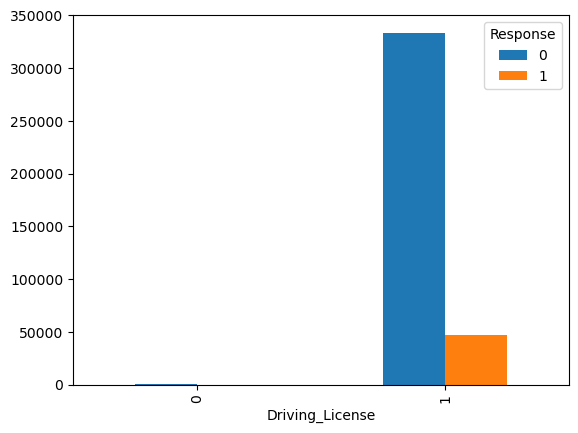

In [40]:
# Driving_License VS Respoanse
plt.figure(figsize=(7,5))
train.groupby(['Driving_License', 'Response']).size().unstack().plot(kind = 'bar')
plt.savefig('images/cross_sell/Driving_LicenseVSResponse.png')

In [ ]:
# Over 99.5% of the Customer have driving license

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


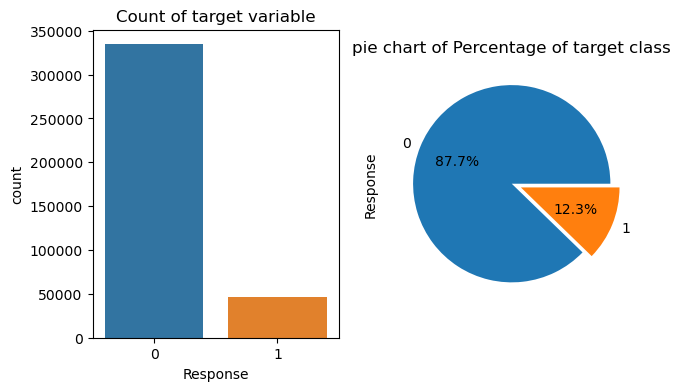

In [42]:
## Target Variable
plt.subplot(1, 2, 1)
sns.countplot(train['Response'])
plt.title("Count of target variable")

#Plotting the percentage of Response
plt.subplot(1,2,2)
count = train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%', figsize = (7,4),explode = [0,0.1], title = "pie chart of Percentage of target class")
print( "Percentage of target class\n")
print(train['Response'].value_counts()/len(train)*100)
plt.savefig('images/cross_sell/Target.png')

## Check the outlier

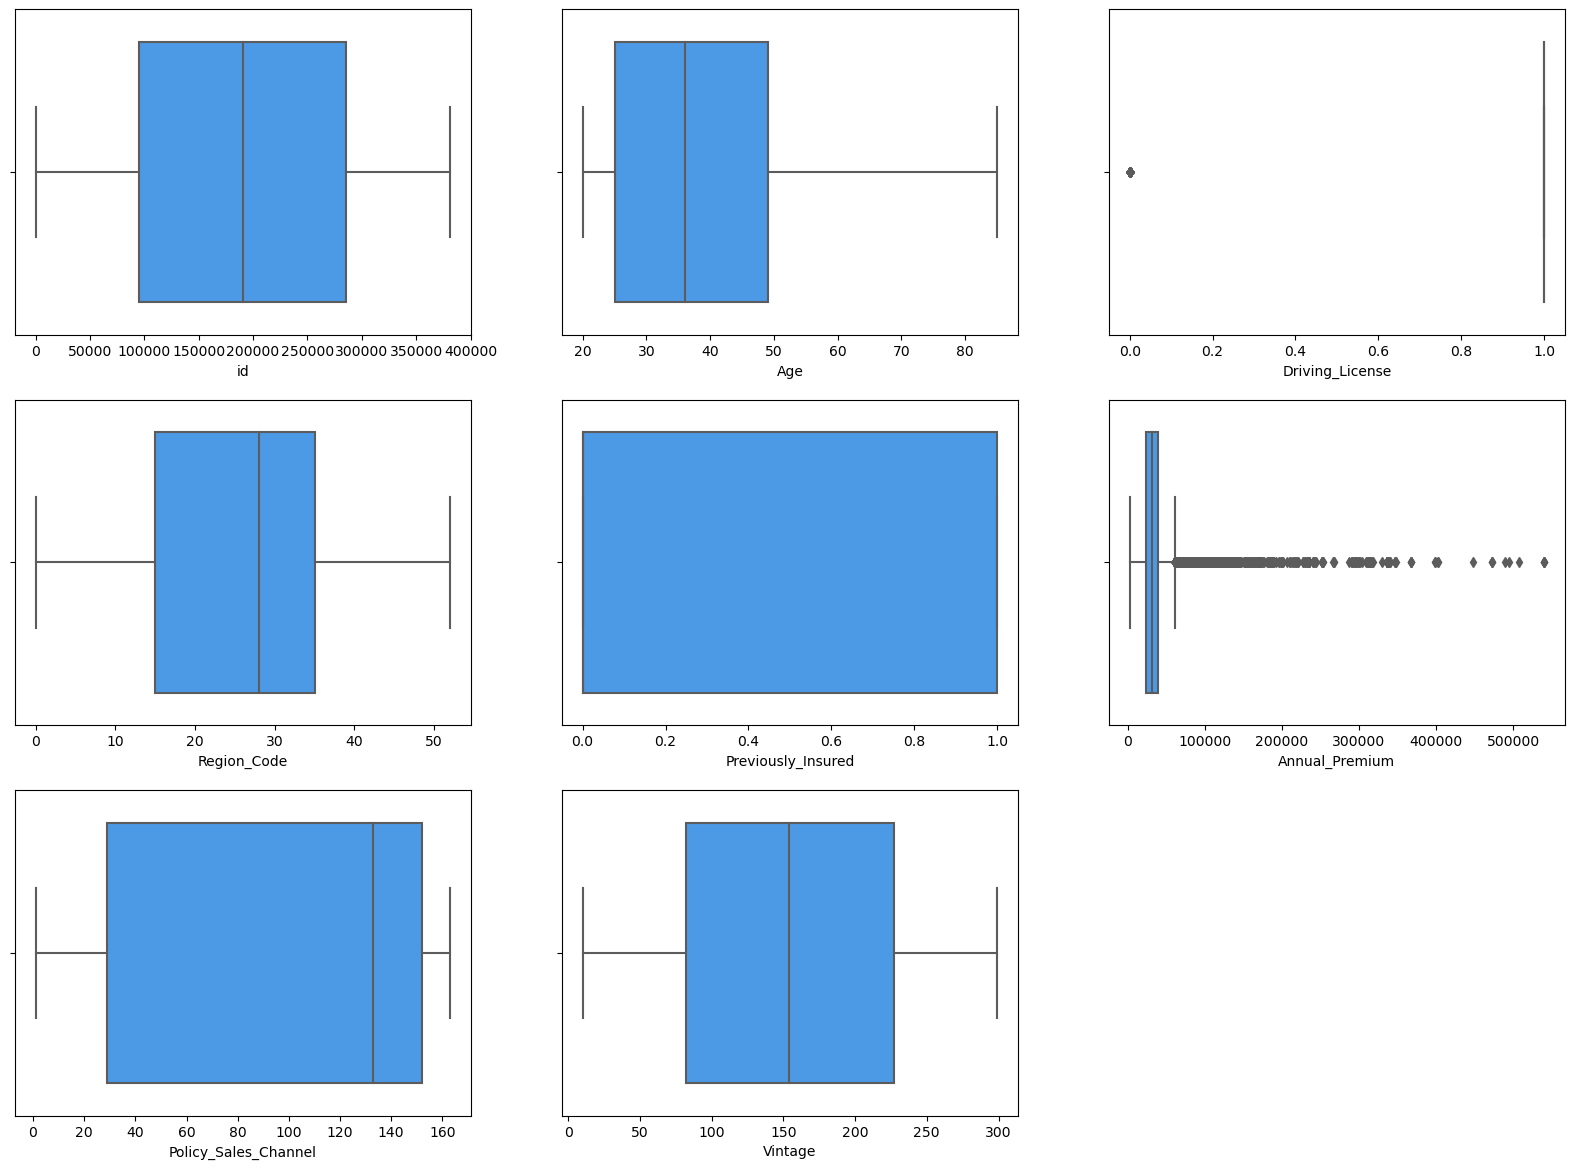

In [43]:
## Find outlier
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
color = '#3399FF'
for num_feature in num_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(train[num_feature],color=color)
    plt.xlabel(num_feature)
    plotnumber+=1
plt.savefig(f'images/cross_sell/outliers.png')
plt.show()

In [44]:
## no outliers

## Data preprocessing

In [45]:
labelEncoder= LabelEncoder()
train['Gender'] = labelEncoder.fit_transform(train['Gender'])
train['Vehicle_Age'] = labelEncoder.fit_transform(train['Vehicle_Age'])
train['Vehicle_Damage'] = labelEncoder.fit_transform(train['Vehicle_Damage'])

## Feature Slection 

In [88]:
x=train.drop(['Response'],axis=1)
y=train['Response'] 

[0.1938117  0.00604242 0.13842102 0.00048556 0.09428243 0.05577054
 0.01396841 0.07765608 0.16367304 0.06841166 0.18747713]


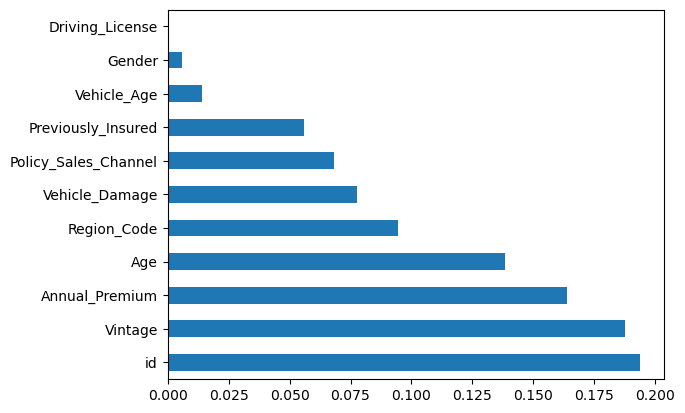

In [69]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.savefig(f'images/cross_sell/feature_selection.png')
plt.show()

In [89]:
x=x.drop(['Driving_License','Gender','id'],axis=1)

## sampling the data

In [71]:
train.shape[0]

381109

In [72]:
test.shape[0]

127037

In [73]:
# 334399+46710

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


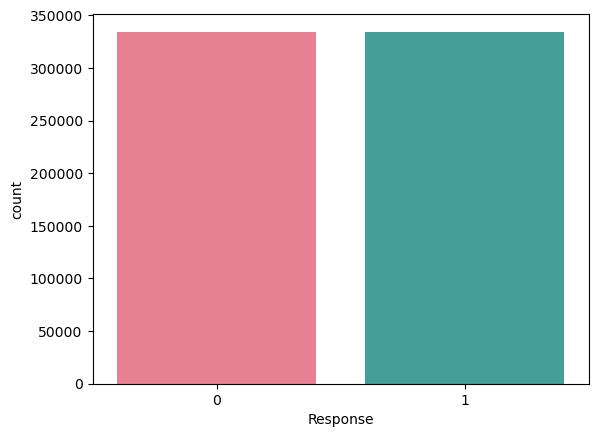

In [90]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
x_new, y_new = ros.fit_resample(x, y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new,palette='husl')
plt.savefig(f'images/cross_sell/balance_data.png')

In [91]:
# ## Scaling the data using MinMaxScalar
# ## scaloing the data
# minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
# minmax.fit(x).transform(x)

## Train and Test split

In [93]:
#Splitting the dataset into Training set and Test set
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_new,y_new,test_size=0.3)

# from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(X_train)
xtest=scaler.transform(X_test)

In [94]:
X_train.head()

,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
281921,53,28.0,0,2,1,109236.0,122.0,114
507816,52,31.0,0,0,1,2630.0,163.0,253
405045,61,28.0,0,0,1,39391.0,122.0,115
381754,47,25.0,0,0,1,2630.0,26.0,23
61743,66,28.0,0,0,1,48837.0,26.0,277


## 1.Logistic Regression -sklearn

In [95]:
## Logistic Regression
logistic_model = LogisticRegression(random_state=30)
logistic_model=logistic_model.fit(X_train,Y_train)
#Making prediction
y_pred_lg = logistic_model.predict(X_test)
y_pred_prob_lg = logistic_model.predict_proba(X_test)[:,1]

In [96]:
recall_score_sk= recall_score(Y_test, y_pred_lg)
print("Recall_Score : ", recall_score_sk)
precision_score_sk= precision_score(Y_test, y_pred_lg)
print("precision_score : ", precision_score_sk)
f1_score_sk= f1_score(Y_test, y_pred_lg)
print("f1_Score :", f1_score_sk)
accuracy_score_sk= accuracy_score(Y_test, y_pred_lg)
print("Accuracy_Score :",accuracy_score_sk)
roc_auc_score_sk = roc_auc_score(y_pred_lg, Y_test)
print("ROC_AUC Score:",roc_auc_score_sk)

Recall_Score :  0.535078784973938
precision_score :  0.5974445881461
f1_Score : 0.564544506368588
Accuracy_Score : 0.5879884370015949
ROC_AUC Score: 0.5888942665286149


In [97]:
print(classification_report(y_pred_lg, Y_test))

              precision    recall  f1-score   support

           0       0.64      0.58      0.61    110948
           1       0.54      0.60      0.56     89692

    accuracy                           0.59    200640
   macro avg       0.59      0.59      0.59    200640
weighted avg       0.59      0.59      0.59    200640



## 2.Logistic Regressionn -statsmodels

In [98]:
lr_model = sm.Logit(Y_train, X_train)
result = lr_model.fit()
y_pred = result.predict(X_test)
threshold = 0.5
y_pred[y_pred < threshold] = 0
y_pred[y_pred >= threshold] = 1
accuracy = accuracy_score(Y_test, y_pred)

Optimization terminated successfully.
         Current function value: 0.450432
         Iterations 9


In [99]:
recall_score_sm= recall_score(Y_test, y_pred)
print("Recall_Score : ", recall_score_sm)
precision_score_sm= precision_score(Y_test, y_pred)
print("Precision_Score : ", precision_score_sm)
f1_score_sm= f1_score(Y_test, y_pred)
print("f1_Score :", f1_score_sm)
accuracy_score_sm= accuracy_score(Y_test, y_pred)
print("Accuracy_Score :",accuracy_score_sm)
roc_auc_score_sm = roc_auc_score(y_pred_lg, y_pred)
print("ROC_AUC Score:",roc_auc_score_sm)

Recall_Score :  0.9775727437940607
Precision_Score :  0.7052145537843153
f1_Score : 0.8193531378547009
Accuracy_Score : 0.7848435007974481
ROC_AUC Score: 0.6134142814663566


In [100]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73    100494
           1       0.71      0.98      0.82    100146

    accuracy                           0.78    200640
   macro avg       0.83      0.79      0.78    200640
weighted avg       0.83      0.78      0.78    200640



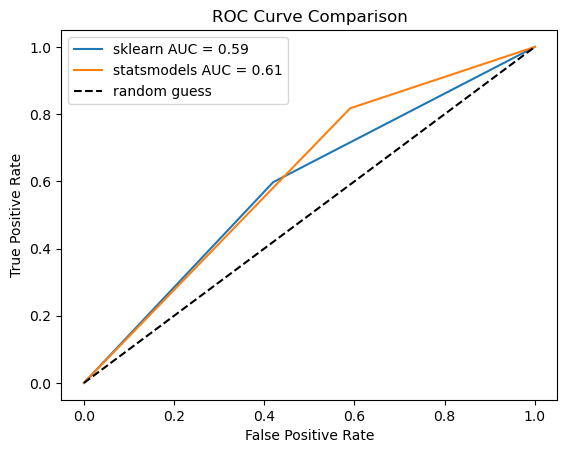

In [101]:
# Calculate false positive rate, true positive rate, and AUC
fpr_sk, tpr_sk, _ = roc_curve(y_pred_lg, Y_test)
roc_auc_sk = roc_auc_score(y_pred_lg, Y_test)
fpr_sm, tpr_sm, _ = roc_curve(y_pred_lg, y_pred)
roc_auc_sm = roc_auc_score(y_pred_lg, y_pred)
plt.plot(fpr_sk, tpr_sk, label=f'sklearn AUC = {roc_auc_sk:.2f}')
plt.plot(fpr_sm, tpr_sm, label=f'statsmodels AUC = {roc_auc_sm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## 3.Decision Tree -sklearn

In [104]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred_d= clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_d)
# print(f'Accuracy: {accuracy}')

Accuracy: 0.9374700956937799


In [105]:
recall_score_d= recall_score(Y_test, y_pred_d)
print("Recall_Score : ", recall_score_d)
precision_score_d= precision_score(Y_test, y_pred_d)
print("Precision : ", precision_score_d)
f1_score_d= f1_score(Y_test, y_pred_d)
print("f1_Score :", f1_score_d)
accuracy_score_d= accuracy_score(Y_test, y_pred_d)
print("Accuracy_Score :",accuracy_score_d)
roc_auc_score_d = roc_auc_score(Y_test,y_pred_d)
print("ROC_AUC Score:",roc_auc_score_d)

Recall_Score :  0.9965949713418409
Precision :  0.891036514596911
f1_Score : 0.9408642696883425
Accuracy_Score : 0.9374700956937799
ROC_AUC Score: 0.9375724672618612


In [110]:
print(classification_report(Y_test, y_pred_d))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    100494
           1       0.89      1.00      0.94    100146

    accuracy                           0.94    200640
   macro avg       0.94      0.94      0.94    200640
weighted avg       0.94      0.94      0.94    200640



## 4. Decision Tree -xgboost

In [106]:
clf = xgb.XGBClassifier()
clf.fit(X_train, Y_train)
y_pred_dxgb = clf.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred_dxgb)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8125697767145136


In [107]:
recall_score_dxg= recall_score(Y_test, y_pred_dxgb)
print("Recall_Score : ", recall_score_dxg)
precision_score_dxg= precision_score(Y_test, y_pred_dxgb)
print("Precision : ", precision_score_dxg)
f1_score_dxg= f1_score(Y_test, y_pred_dxgb)
print("f1_Score :", f1_score_dxg)
accuracy_score_dxg= accuracy_score(Y_test, y_pred_dxgb)
print("Accuracy_Score :",accuracy_score_dxg)
roc_auc_score_dxg = roc_auc_score(Y_test,y_pred_dxgb)
print("ROC_AUC Score:",roc_auc_score_dxg)

Recall_Score :  0.9391787989535278
Precision :  0.7490244485147727
f1_Score : 0.8333924046146485
Accuracy_Score : 0.8125697767145136
ROC_AUC Score: 0.8127889934823762


In [108]:
print(classification_report(Y_test, y_pred_dxgb))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79    100494
           1       0.75      0.94      0.83    100146

    accuracy                           0.81    200640
   macro avg       0.83      0.81      0.81    200640
weighted avg       0.83      0.81      0.81    200640



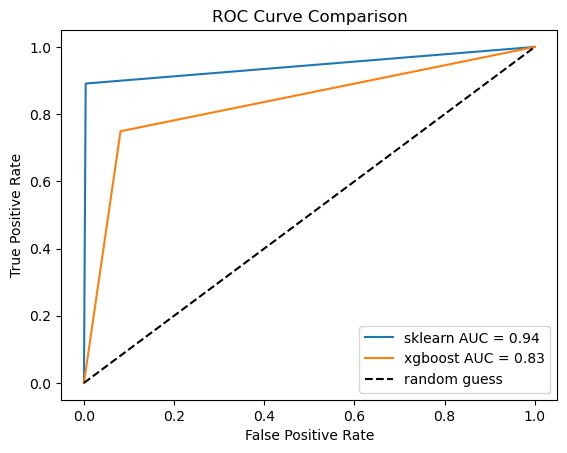

In [115]:
fpr_sk, tpr_sk, _ = roc_curve(y_pred_d, Y_test)
roc_auc_sk = roc_auc_score(y_pred_d, Y_test)
fpr_sm, tpr_sm, _ = roc_curve(y_pred_dxgb, Y_test)
roc_auc_sm = roc_auc_score(y_pred_dxgb, Y_test)
plt.plot(fpr_sk, tpr_sk, label=f'sklearn AUC = {roc_auc_sk:.2f}')
plt.plot(fpr_sm, tpr_sm, label=f'xgboost AUC = {roc_auc_sm:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()

In [113]:
metrics = {
    'Model': ['XGBoost', 'Decision Tree'],
    'Accuracy': [accuracy_score_dxg, accuracy_score_d],
    'Precision': [precision_score_dxg, precision_score_d],
    'Recall': [recall_score_dxg, recall_score_d],
    'F1 Score': [f1_score_dxg, f1_score_d],
    'ROC AUC Score': [roc_auc_score_dxg, roc_auc_score_d]
}

# Create a pandas DataFrame from the metrics dictionary
df_metrics = pd.DataFrame(metrics)

# Print the DataFrame
print(df_metrics)

           Model  Accuracy  Precision    Recall  F1 Score  ROC AUC Score
0        XGBoost   0.81257   0.749024  0.939179  0.833392       0.812789
1  Decision Tree   0.93747   0.891037  0.996595  0.940864       0.937572


In [114]:
scores = {
    'Model': ['Statsmodel', 'scikit-learn'],
    'Recall': [recall_score_sm, recall_score_sk],
    'Precision': [precision_score_sm, precision_score_sk],
    'F1-score': [f1_score_sm, f1_score_sk],
    'Accuracy': [accuracy_score_sm, accuracy_score_sk],
    'ROC-AUC': [roc_auc_score_sm, roc_auc_score_sk]
}

# Convert the dictionary to a pandas dataframe
scores_df = pd.DataFrame(scores)

# Set the 'Model' column as the index
scores_df.set_index('Model', inplace=True)

# Display the dataframe
print(scores_df)

                Recall  Precision  F1-score  Accuracy   ROC-AUC
Model                                                          
Statsmodel    0.977573   0.705215  0.819353  0.784844  0.613414
scikit-learn  0.535079   0.597445  0.564545  0.587988  0.588894
